In [11]:
import os
import sys
import anndata
import matplotlib
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns

In [51]:
adata = sc.read_h5ad("Visium_IRI_R.h5ad")

In [52]:
value_mapping = {
    'CN0': 'CN0: Loop of Henle',
    'CN1': 'CN1: Glomerular Niche',
    'CN2': 'CN2: Cortical Proximal Tubule',
    'CN3': 'CN3: Medullary Proximal Tubule',
    'CN4': 'CN4: Injured Proximal Tubule',
    'CN5': 'CN5: Collecting Duct Niche',
    'CN6': 'CN6: Distal Tubule Niche',
    'CN7': 'CN7: Fibro-inflammatory Niche',
    'CN8': 'CN8: Uro-immune Niche'
}

In [53]:
adata.obs['CN_rename'] = adata.obs['assigned_cn_label'].map(value_mapping)

In [54]:
adata.uns['CN_rename_colors']= ['#80b1d3', '#bc80bd', '#8dd3c7', '#ffffb3', '#fccde5', '#d9d9d9','#b3de69', '#fdb462', '#fb8072']

In [74]:
map_dict = dict(zip(adata.obs['assigned_cn_label'].cat.categories,adata.uns['CN_rename_colors']))

In [177]:
sc.tl.rank_genes_groups(adata, groupby='CN_rename', key_added="CN_DE_genes", use_raw=False, pts=True)

In [111]:
genes =['Wnt7b','Cldn19','Sim2','Ppp1r1b','Nccrp1',
           'Nphs2','Nphs1','Myom2','Sema3g','Clic3',
           'G6pc','Acmsd','Clec2h','Slc51a','Trim63',
           'Slc22a19','Serpina1d','Slc22a13','Cyp7b1',
           'Serpina1f','Fosl1','Plin2','Srxn1','Krt20','Sox9','Cdkn1a','Plk3',
           'Tnfrsf12a','Slc26a4','Trpv5','Atp6v1g3',
           'Slc12a3','Ptgfr','Pvalb',
           'Vcam1','Aoc1','Gpc3','Mmp2','Col1a1','Mrc2','Fn1','Tgfb1',
           'Acta2','S100a4','Ccl6','Ccl8','Krt19',
          ]

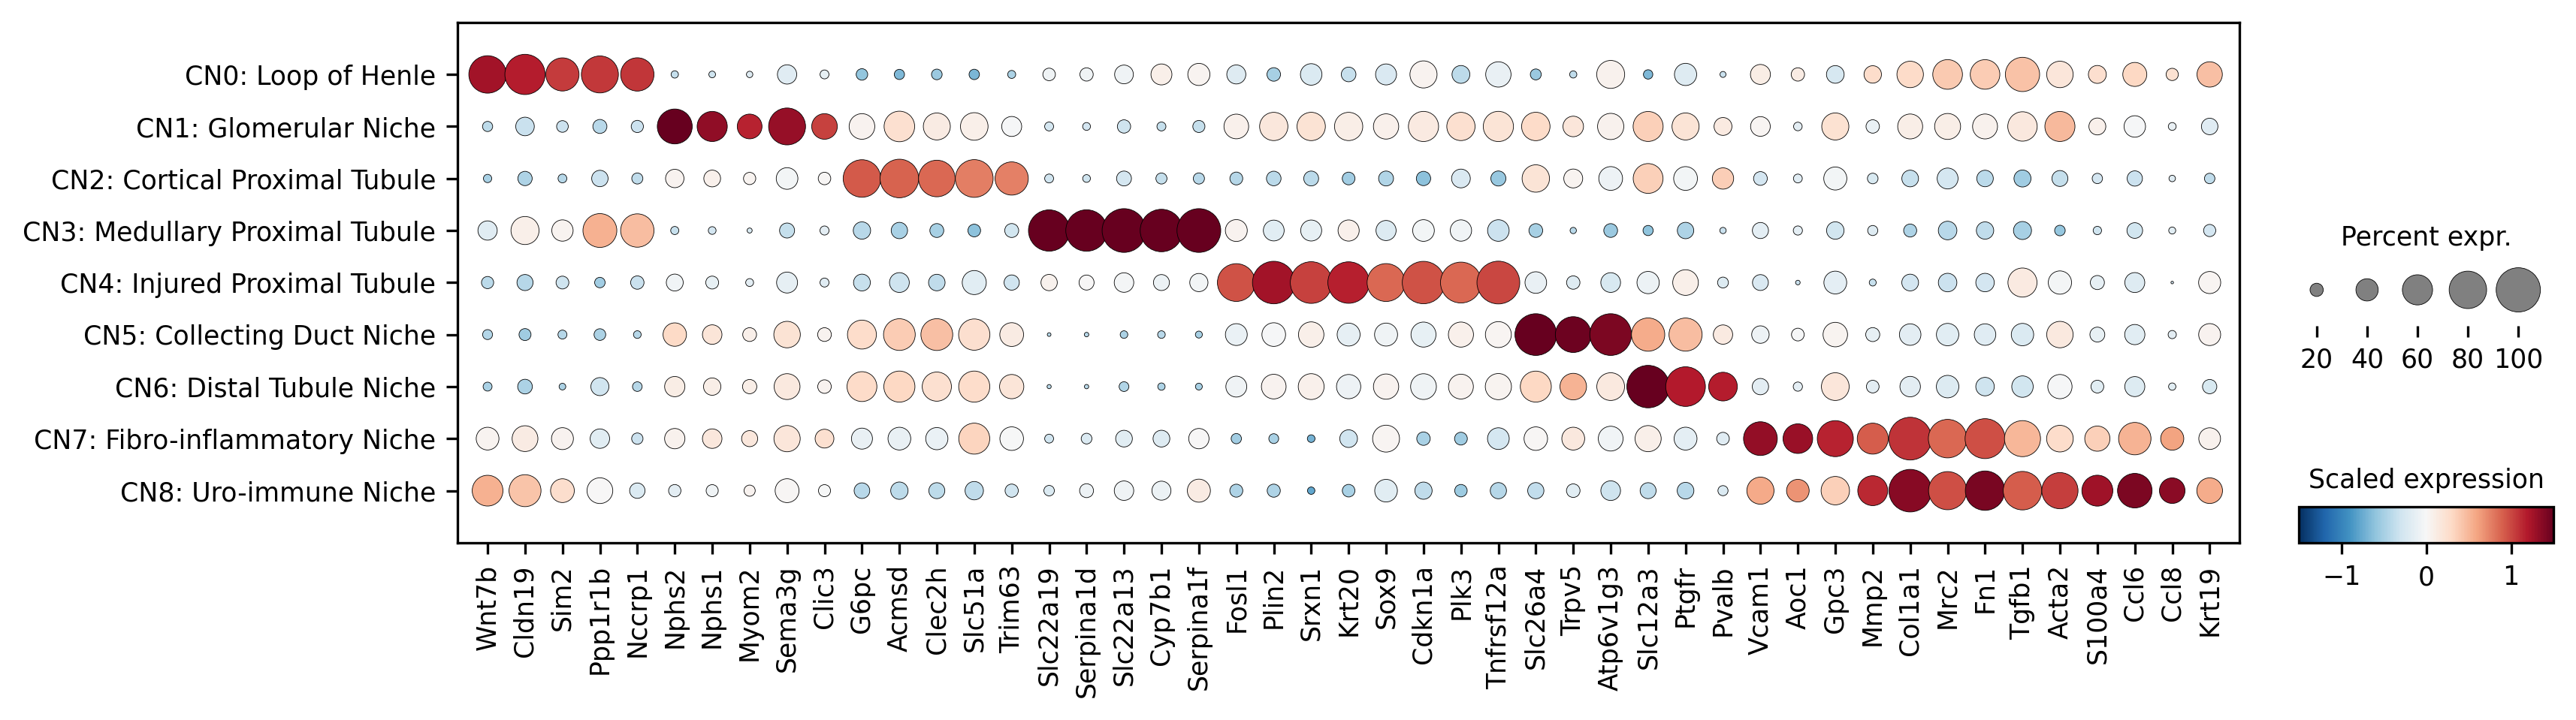

In [113]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('WhRd',['#3777a3', "#53c4ab", "#ffffff", "#d599bd", "#92628f"], N=256)  
with plt.rc_context({"figure.dpi": (300)}):
    dp = sc.pl.dotplot(adata, genes, 'CN_rename', cmap = 'RdBu_r', figsize=(12,3),show=False,return_fig=True,
                  layer='scaled', vmax=1.5, vmin = -1.5, dendrogram=False)
    dp.legend(colorbar_title='Scaled expression', size_title = "Percent expr.")
    dp.savefig("Visium_CN_genes.pdf", transparent=True, bbox_inches="tight", dpi=300)
    plt.show()

In [60]:
corr_df = pd.read_csv("Xe2vis_map_df_diameter_55um.csv", index_col=0)

In [61]:
enrich_df = corr_df.groupby(["spot_id","celltype"]).size().unstack(fill_value=0)

In [62]:
adata = adata[enrich_df.index,]
adata

View of AnnData object with n_obs × n_vars = 9209 × 19465
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'X_coords', 'Y_coords', 'ident', 'res2', 'x_centroid', 'y_centroid', 'celltype_raw', 'x_align', 'y_align', 'assigned_cn_label', 'CN_rename'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_raw_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'res2_colors', 'umap', 'CN_rename_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

In [63]:
adata_CNct = anndata.AnnData(X=enrich_df.values, var=pd.DataFrame(index=enrich_df.columns))

In [64]:
adata_CNct.obs_names = enrich_df.index.to_list()

In [65]:
adata_CNct.obs['CN_rename'] = adata.obs['CN_rename']

In [66]:
adata_CNct.layers['scaled'] = sc.pp.scale(adata_CNct, copy=True).X

In [67]:
ct_order = ['Uro','Immune','Fib','FR_PT','DCT','CNT', 'ICA', 'ICB', 'PC', 
            'Inj_PT','PTS3','PTS1', 'PTS2', 'PEC','Pod','Glom-EC','Per-SMC','TAL','DTL','EC']
ct_order.reverse()

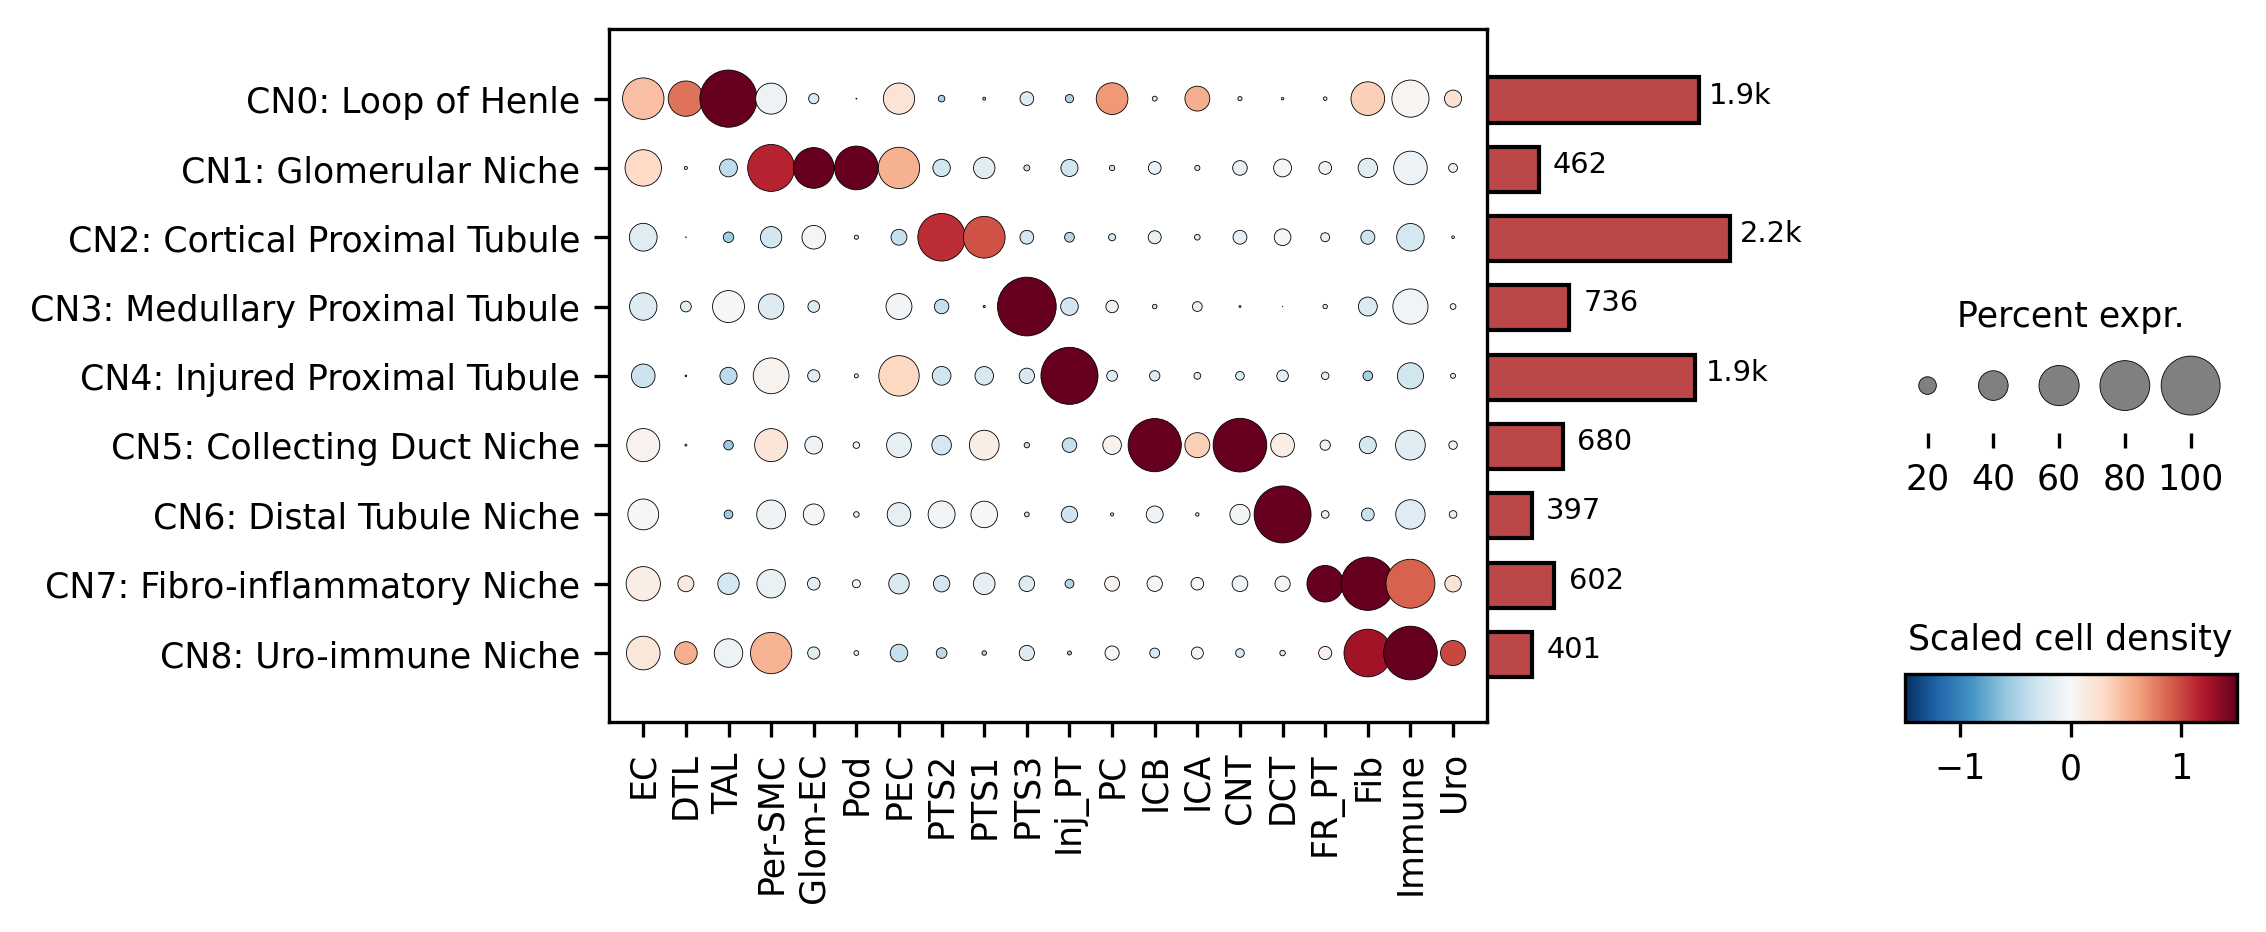

In [68]:
with plt.rc_context({"figure.dpi": (300)}):
    dp = sc.pl.dotplot(adata_CNct, ct_order, 'CN_rename', layer='scaled', cmap = 'RdBu_r', figsize=(7,3), show=False,  
                  vmax=1.5, vmin = -1.5, dendrogram=False, return_fig=True)
    dp.add_totals(size=1.2, color = "#BC4749").legend(colorbar_title='Scaled cell density', size_title = "Percent expr.")
    dp.savefig("Visium_CN_ct.pdf", transparent=True, bbox_inches="tight", dpi=300)
    plt.show()